In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt
df=pd.read_csv("customers.csv")

In [ ]:
df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [ ]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
df.shape


(10695, 11)

In [ ]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [ ]:
df_processed=df.dropna(axis=0)

In [ ]:
df_processed.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


In [ ]:
df_processed.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
df_processed.shape

(8819, 11)

In [ ]:
df_processed.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
df_processed['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:

df_processed['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:

df_processed['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:

df_processed['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [ ]:

df_processed['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [ ]:

df_processed['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [ ]:

df_processed['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [ ]:

categories_list=[['Male', 'Female'],
           ['No', 'Yes'],
           ['No', 'Yes'],
           ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
            'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
           ['Low', 'Average', 'High']
           ]
enc = OrdinalEncoder(categories=categories_list)

In [ ]:
enc

OrdinalEncoder(categories=[['Male', 'Female'], ['No', 'Yes'], ['No', 'Yes'],
                           ['Healthcare', 'Engineer', 'Lawyer', 'Artist',
                            'Doctor', 'Homemaker', 'Entertainment', 'Marketing',
                            'Executive'],
                           ['Low', 'Average', 'High']])

In [ ]:
df_processed.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
data = df_processed.copy()

In [ ]:
data[['Gender',
             'Ever_Married',
              'Graduated','Profession',
              'Spending_Score']] = enc.fit_transform(data[['Gender',
                                                                 'Ever_Married',
                                                                 'Graduated','Profession',
                                                                 'Spending_Score']])
     

In [ ]:
data.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:

le = LabelEncoder()
data['Segmentation'] = le.fit_transform(data['Segmentation'])
     

In [ ]:

data.dtypes
     

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int64
dtype: object

In [ ]:
data= data.drop('ID',axis=1)
data = data.drop('Var_1',axis=1)
     

In [ ]:
data.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

<Axes: >

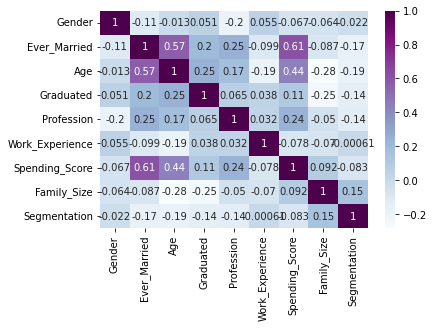

In [ ]:
# Calculate the correlation matrix
corr = data.corr()

# Plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)
     

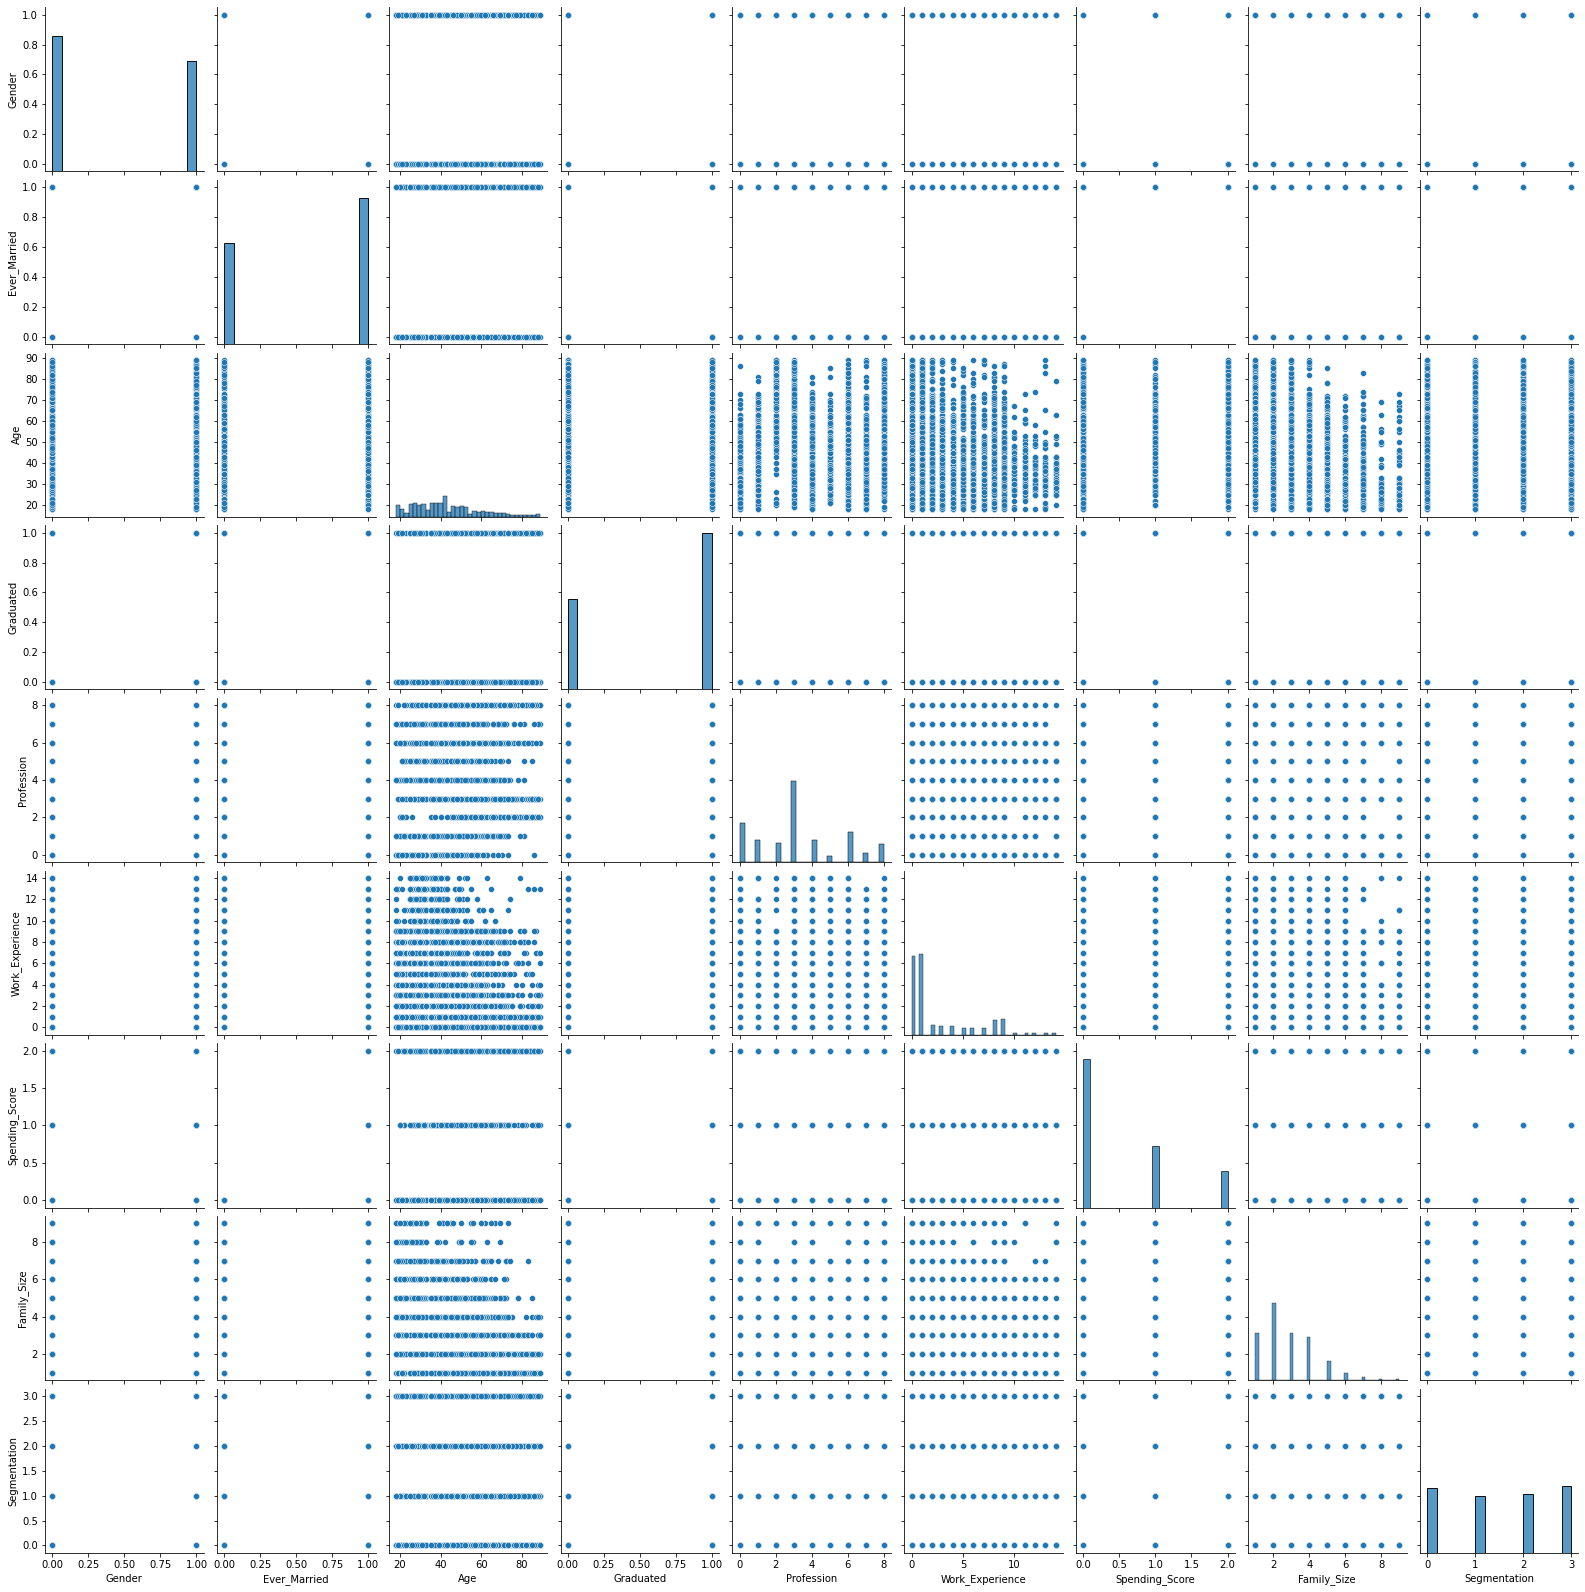

In [ ]:
sns.pairplot(data)

<ipython-input-103-ec135ce2bd5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

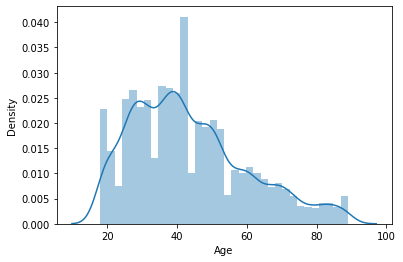

In [ ]:
sns.distplot(data['Age'])

<Axes: ylabel='count'>

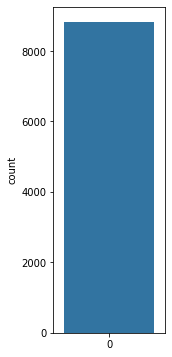

In [ ]:

plt.figure(figsize=(2,6))
sns.countplot(data['Family_Size'])

<Axes: xlabel='Family_Size', ylabel='Age'>

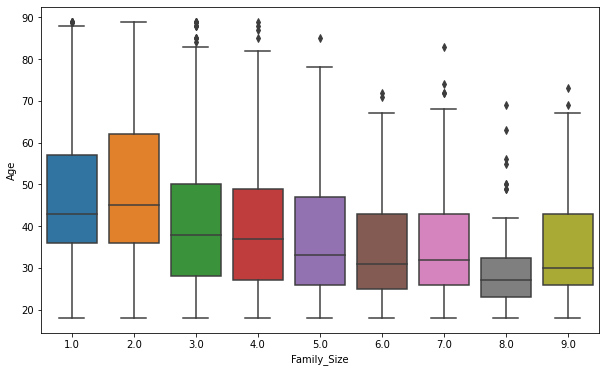

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Family_Size',y='Age',data=data)
     

<Axes: xlabel='Family_Size', ylabel='Spending_Score'>

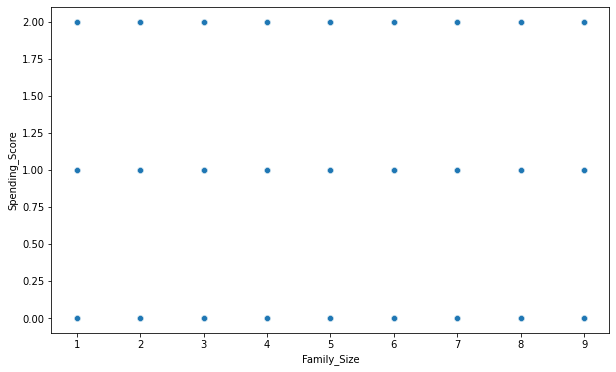

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Spending_Score',data=data)
   

<Axes: xlabel='Family_Size', ylabel='Age'>

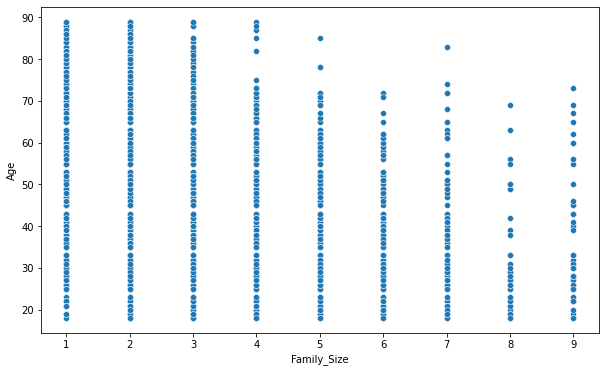

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Age',data=data)
   

In [ ]:
data.describe()
     

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000
mean,0.448804,0.591450,43.517859,0.634312,3.287561,2.610160,0.544846,2.840118,1.518086
std,0.497400,0.491594,16.581537,0.481650,2.346652,3.390676,0.738487,1.535051,1.146645
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,41.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [ ]:

data['Segmentation'].unique()

array([3, 1, 2, 0])

In [ ]:
X=data[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values
 

In [ ]:
y1 = data[['Segmentation']].values

In [ ]:
one_hot_enc = OneHotEncoder()
one_hot_enc.fit(y1)

OneHotEncoder()

In [ ]:
y1.shape

(8819, 1)

In [ ]:
y = one_hot_enc.transform(y1).toarray()

In [ ]:
y.shape

(8819, 4)

In [ ]:
y1[0]

array([3])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.3,
                                               random_state=50)
     

In [ ]:
scaler_age = MinMaxScaler()
scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [ ]:
X_train[0]

array([ 0.,  0., 30.,  1.,  4.,  3.,  0.,  2.])

In [ ]:
X_train.shape

(6173, 8)

In [ ]:
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [ ]:
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [ ]:
X_train[0]

array([ 0.,  0., 30.,  1.,  4.,  3.,  0.,  2.])

In [ ]:
X_train.shape

(6173, 8)

In [ ]:
ai_brain = tf.keras.Sequential([tf.keras.layers.Input(shape=(8,)),
                           tf.keras.layers.Dense(256,activation="relu"),
                           tf.keras.layers.Dense(128,activation="relu"),
                           tf.keras.layers.Dense(64,activation="relu"),
                           tf.keras.layers.Dense(32,activation="relu"),
                           tf.keras.layers.Dense(16,activation="relu"),
                           tf.keras.layers.Dense(8,activation="relu"),
                           tf.keras.layers.Dense(4,activation="softmax")])

In [ ]:
ai_brain.compile(optimizer='adagrad',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
   

In [ ]:
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs=200,batch_size=32,
             validation_data=(X_test_scaled,y_test),
             #callbacks=[early_stop]
             )

Epoch 1/200
193/193 [==============================] - 2s 5ms/step - loss: 1.3849 - accuracy: 0.3052 - val_loss: 1.3833 - val_accuracy: 0.3405
Epoch 2/200
193/193 [==============================] - 1s 5ms/step - loss: 1.3805 - accuracy: 0.3460 - val_loss: 1.3778 - val_accuracy: 0.3432
Epoch 3/200
193/193 [==============================] - 1s 7ms/step - loss: 1.3738 - accuracy: 0.3554 - val_loss: 1.3711 - val_accuracy: 0.3541
Epoch 4/200
193/193 [==============================] - 1s 7ms/step - loss: 1.3665 - accuracy: 0.3634 - val_loss: 1.3649 - val_accuracy: 0.3696
Epoch 5/200
193/193 [==============================] - 1s 4ms/step - loss: 1.3588 - accuracy: 0.3792 - val_loss: 1.3583 - val_accuracy: 0.3757
Epoch 6/200
193/193 [==============================] - 1s 4ms/step - loss: 1.3513 - accuracy: 0.3857 - val_loss: 1.3523 - val_accuracy: 0.3881
Epoch 7/200
193/193 [==============================] - 1s 4ms/step - loss: 1.3440 - accuracy: 0.3953 - val_loss: 1.3455 - val_accuracy: 0.3847

In [ ]:
metrics = pd.DataFrame(ai_brain.history.history)
 

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.384950,0.305200,1.383348,0.340514
1,1.380475,0.346023,1.377838,0.343159
2,1.373771,0.355419,1.371118,0.354119
3,1.366533,0.363357,1.364921,0.369615
4,1.358841,0.379232,1.358301,0.375661


<Axes: >

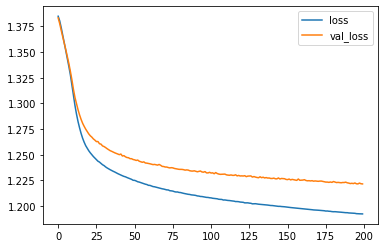

In [ ]:
metrics[['loss','val_loss']].plot()

<Axes: >

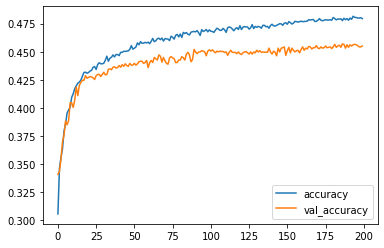

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)
 

83/83 [==============================] - 0s 2ms/step


In [ ]:
x_test_predictions.shape
     

(2646,)

In [ ]:
y_test_truevalue = np.argmax(y_test,axis=1)
 

In [ ]:
y_test_truevalue.shape

(2646,)

In [ ]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))


[[334 106 102 153]
 [214 113 206  92]
 [123  81 329  85]
 [191  42  47 428]]


In [ ]:
print(classification_report(y_test_truevalue,x_test_predictions))


              precision    recall  f1-score   support

           0       0.39      0.48      0.43       695
           1       0.33      0.18      0.23       625
           2       0.48      0.53      0.51       618
           3       0.56      0.60      0.58       708

    accuracy                           0.46      2646
   macro avg       0.44      0.45      0.44      2646
weighted avg       0.44      0.46      0.44      2646



In [ ]:
ai_brain.save('customer_classification_model.h5')
 

In [ ]:
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,data,df_processed,scaler_age,enc,one_hot_enc,le], fh)
   

In [ ]:
ai_brain = load_model('customer_classification_model.h5')


In [ ]:
with open('customer_data.pickle', 'rb') as fh:
   [X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)
   

In [ ]:
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)


1/1 [==============================] - 0s 144ms/step


In [ ]:
print(x_single_prediction)
     

[2]


In [ ]:
print(le.inverse_transform(x_single_prediction))
   

['C']
